# Important: Get kagggle.json before running the notebook
Follow [these instructions](https://github.com/Kaggle/kaggle-api#api-credentials) to get a kaggle.json key file. Then upload it to colab.


In [12]:
#@title Setup for colab { display-mode: "form" }

%%capture
!sudo apt-get install subversion
!svn checkout https://github.com/probml/pyprobml/trunk/scripts/gan .
!pip install pytorch-lightning einops
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/dcgan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/sngan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/gp_wgan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/wgan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/logan_celeba.ckpt

In [13]:
#@title Run Setup And Installation { display-mode: "form" }

from utils.plotting import sample_from_truncated_normal
from assembler import get_config, assembler

def make_model(model_name, use_gpu=False):
  fname = f"./configs/{model_name}.yaml"
  config = get_config(fname)
  vae = assembler(config)
  if use_gpu: vae = vae.to("cuda")
  return vae

def make_and_load_models(model_names: list, use_gpu=False):
  vaes = []
  for model_name in model_names:
    vae = make_model(model_name, use_gpu)
    vae.load_model()
    vaes.append(vae)
  return vaes 

# Compare results

In [16]:
models_to_compare = ["dcgan","sngan", "logan"]
figsize_reconstruction = (10, 30)
figsize_samples = (10, 10)

gans = make_and_load_models(models_to_compare, use_gpu = True)

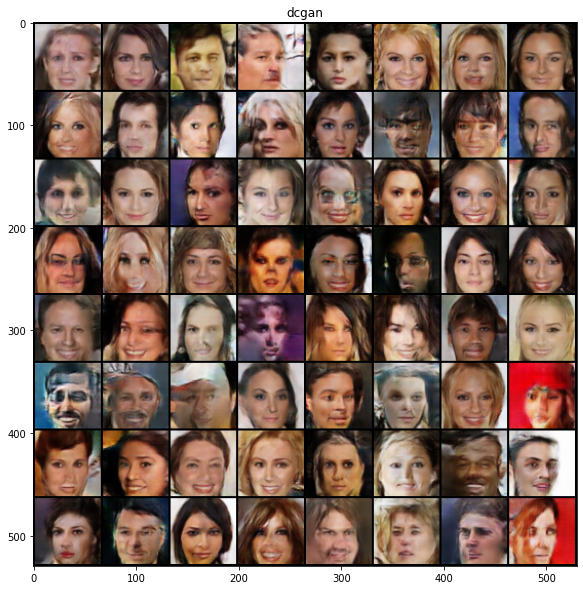

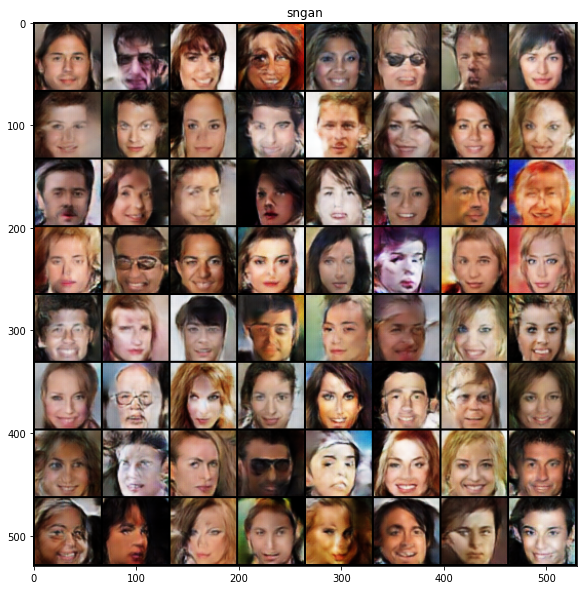

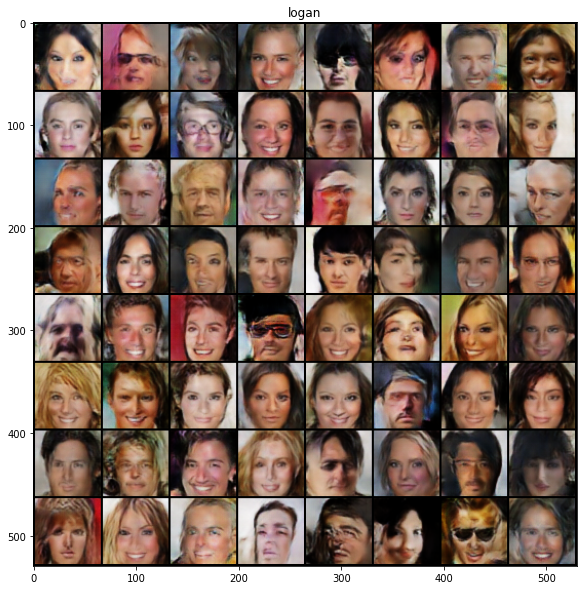

In [21]:
num = 64  #@param {type:"slider", min:1, max:100, step:1}
sample_from_truncated_normal(gans, 64)